## Single Server Queue Simulation

### Import library

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

### Initialization the functions

In [2]:
class QueueSim:
    def __init__(self, next_time, serv_time, total_cust):
        self.next_time = next_time
        self.serv_time = serv_time
        self.tot_cust = total_cust
        self.arr_time = np.zeros(total_cust, dtype=int)
        self.start_serv = np.zeros(total_cust, dtype=int)
        self.end_serv = np.zeros(total_cust, dtype=int)
        self.waiting_time = np.zeros(total_cust, dtype=int)
        
    def simulation(self):
        for i in range(self.tot_cust):
            #arriveList[i] = dt.datetime.fromtimestamp(time).strftime('%H:%M')

            self.arr_time[i] = self.arr_time[i - 1] + self.next_time[i]
            self.start_serv[i] = max(self.arr_time[i], self.end_serv[i - 1])
            self.end_serv[i] = self.start_serv[i] + self.serv_time[i]
        
        self.waiting_time = self.start_serv - self.arr_time
        
    
    def server_utilization(self):
        return (self.tot_cust/self.end_serv[-1]) * (np.mean(self.serv_time))
    
    def average_waiting_time(self):
        sum = 0
        for i in range(self.tot_cust):
            sum += self.waiting_time[i]
            
        return sum/self.tot_cust

### Simulation

In [12]:
target_cust = 25
total_simulation = 180 #number of days
serv_util = np.zeros(total_simulation)
waiting_arr = np.zeros(total_simulation)

for i in range(total_simulation):
    next_arr_time = np.random.poisson(25, target_cust).astype(int) * 60
    service_time = np.random.normal(22, 3, target_cust).astype(int) * 60

    queue1 = QueueSim(next_arr_time, service_time, target_cust)
    queue1.simulation()

    serv_util[i] = queue1.server_utilization()
    waiting_arr[i] = queue1.average_waiting_time() / 60

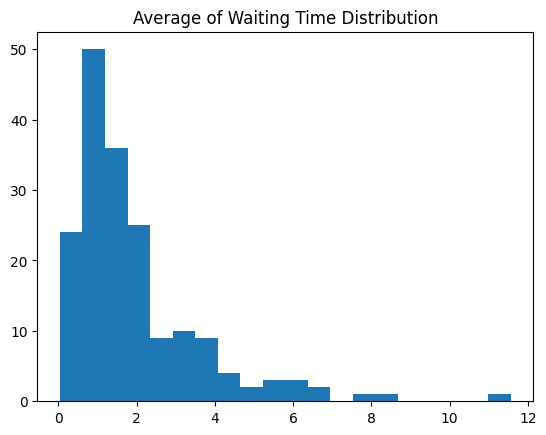

The average of waiting time: 1.9397777777777776 minutes


In [13]:
plt.hist(waiting_arr, 20)
plt.title('Average of Waiting Time Distribution')
plt.show()
print(f'The average of waiting time: {np.mean(waiting_arr)} minutes')

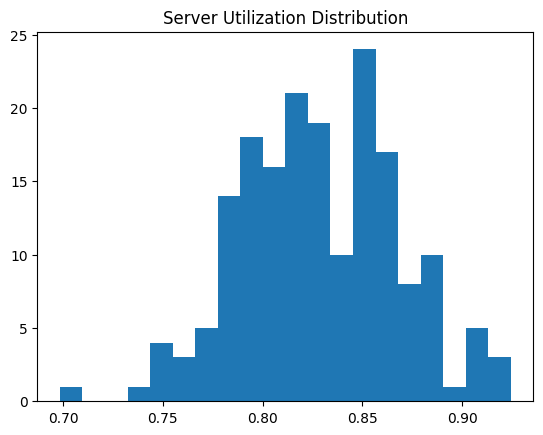

The average of server utilization: 0.8289954147616372 


In [14]:
plt.hist(serv_util, 20)
plt.title('Server Utilization Distribution')
plt.show()
print(f'The average of server utilization: {np.mean(serv_util)} ')